In [1]:
from tree_categorical_variables import *

/Users/kevh/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O cluster uptime:,6 hours 5 mins
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.26.0.5
H2O cluster version age:,12 days
H2O cluster name:,kevh
H2O cluster total nodes:,1
H2O cluster free memory:,1.757 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"


In [66]:
data_categorical, data_onehot = generate_dataset(
    num_x=100, n_samples=10000, n_levels=200)

In [38]:
data_categorical['c'] = data_categorical['c'].map(lambda x: f'{x[1]}{x[0]}{x[2]}')

In [40]:
data_categorical['f'] = data_categorical['c'].map(lambda x: x[0])
print(data_categorical[data_categorical['f'] == 'A'].y.value_counts())
print(data_categorical[data_categorical['f'] != 'A'].y.value_counts())
print(data_categorical[(data_categorical['f'] != 'A') & (data_categorical['z'] > 10)].y.value_counts())

del data_categorical['f']

Series([], Name: y, dtype: int64)
1    5006
0    4994
Name: y, dtype: int64
1    2513
Name: y, dtype: int64


In [4]:
data_categorical[data_categorical['z'] > 10].y.value_counts()

1    2538
Name: y, dtype: int64

In [6]:
data_categorical.z.describe()

count    10000.000000
mean         7.953244
std          4.591535
min         -8.070619
25%          5.086285
50%          7.775770
75%         10.048064
max         27.312862
Name: z, dtype: float64

In [14]:
data_categorical.c.describe()

count     10000
unique      200
top         Bar
freq         79
Name: c, dtype: object

In [67]:
data_categorical.head()

,y,c,z,x0,x1,x2,x3,x4,x5,x6,...,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99
0,0,Bdq,8.650063,-7.362516,12.610482,-16.445769,-8.712501,-1.408969,17.360674,20.117904,...,-1.771201,-6.362642,-0.461043,0.426149,0.835008,-16.929609,-6.039667,6.392680,2.794829,1.760984
1,0,Bce,5.267476,-13.313953,12.786342,13.796042,-11.890297,5.981830,-10.625892,-17.693169,...,0.995820,8.332076,-0.326282,4.272915,8.070229,3.904496,-12.581185,-6.427811,-4.420588,0.798940
2,1,Adu,2.354689,2.016697,-0.046135,-2.584253,15.981124,0.564777,8.748024,-2.934120,...,9.535916,-11.595127,-9.438079,7.121571,14.296482,4.293138,-7.637406,16.007456,-15.509930,1.289405
3,1,Adg,7.461866,-1.556582,6.860336,-16.192870,-20.683423,-8.416061,6.054109,1.426555,...,-3.385860,0.900670,-21.592437,-21.866803,-11.013119,-20.195275,8.336469,1.703364,-9.315631,-1.734286
4,1,Adk,8.883467,-4.370796,10.257110,-8.367582,15.528097,-2.804002,4.246562,-12.117824,...,19.243603,1.505253,6.953755,-0.518247,-13.811169,-7.857783,-8.591199,-11.809902,-10.529481,15.588116


In [42]:
data_onehot.head()

,y,z,x0,x1,x2,x3,x4,x5,x6,x7,...,c_Bdm,c_Bdn,c_Bdo,c_Bdp,c_Bdq,c_Bdr,c_Bds,c_Bdt,c_Bdu,c_Bdv
0,0,7.704702,-1.770791,-6.010690,15.749276,-4.194782,8.271126,-2.171264,-1.681038,10.002809,...,0,0,0,0,0,0,0,0,0,0
1,1,13.569763,5.025112,-2.448301,-8.330329,-6.984128,1.748191,17.378276,-9.249995,14.331462,...,0,0,0,0,0,0,0,0,0,0
2,0,9.273357,8.127631,17.055185,-16.583527,-2.023542,7.972909,19.042204,3.256783,-6.293394,...,0,0,0,0,0,0,0,0,0,0
3,0,6.327702,15.248791,14.988669,0.553656,-22.842058,4.610370,14.069744,7.872765,-1.053273,...,0,0,0,0,0,0,0,0,0,0
4,1,9.628352,-1.402429,-21.607135,-11.379105,-10.457148,21.581466,6.195747,-40.218020,-4.124362,...,0,0,0,0,0,0,0,0,0,0


In [43]:
# use z and the x columns (no c)
results_no_c = evaluate_sklearn_model(
    data_onehot, 
    feature_names=get_feature_names(data_onehot, include_c=False),
    target_col='y',
    model=DecisionTreeClassifier())
print_auc_mean_std(results_no_c)

AUC: mean 0.7340, sd 0.0062


In [44]:
# use z, x and c columns
results_with_c = evaluate_sklearn_model(
    data_onehot, 
    feature_names=get_feature_names(data_onehot, include_c=True),
    target_col='y',
    model=DecisionTreeClassifier())
print_auc_mean_std(results_with_c)

AUC: mean 0.7563, sd 0.0149


In [29]:
>>> from sklearn import tree

In [39]:
tree.export_graphviz(results_with_c['models'][0])

!dot -Tpng tree.dot -o tree.png

from IPython.display import display
from PIL import Image

# showing the image in notebook
#display(Image.open('tree.png'))
# IOPub data rate exceeded.
# The notebook server will temporarily stop sending output
# to the client in order to avoid crashing it.
# To change this limit, set the config variable
# `--NotebookApp.iopub_data_rate_limit`.

/Users/kevh/anaconda/lib/python3.6/site-packages/sklearn/tree/export.py:399: DeprecationWarning: out_file can be set to None starting from 0.18. This will be the default in 0.20.
  DeprecationWarning)
/Users/kevh/anaconda/lib/python3.6/site-packages/PIL/Image.py:2496: DecompressionBombWarning: Image size (268284960 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning)
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [45]:
from sklearn import tree

In [35]:
>>> from sklearn.datasets import load_iris
>>> from sklearn import tree
>>>
>>> clf = tree.DecisionTreeClassifier()
>>> iris = load_iris()
>>>
>>> clf = clf.fit(iris.data, iris.target)
>>> tree.export_graphviz(clf) 

/Users/kevh/anaconda/lib/python3.6/site-packages/sklearn/tree/export.py:399: DeprecationWarning: out_file can be set to None starting from 0.18. This will be the default in 0.20.
  DeprecationWarning)


In [38]:
%ls

DRF_model_python_1569755221453_100.zip  categorical variables.ipynb
DRF_model_python_1569755221453_120.zip  h2o-genmodel.jar
DRF_model_python_1569755221453_140.zip  model.gv
Untitled.ipynb                          model.png
Untitled1.ipynb                         tree.dot
__pycache__/                            tree_categorical_variables.py


In [ ]:
!java -cp /Users/kevh/Tools/h2o-3.26.0.5/h2o.jar hex.genmodel.tools.PrintMojo --tree 0 -i $model_path -o model.gv -f 20 -d 3

!dot -Tpng model.gv -o model.png

from IPython.display import display
from PIL import Image

# showing the image in notebook
display(Image.open('model.png'))

In [46]:
results_with_c['models']

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False, random_state=None,
             splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False, random_state=None,
             splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf

In [47]:
data_categorical['c'].head()

0    aBx
1    bAi
2    aBy
3    bBx
4    cAu
Name: c, dtype: object

In [19]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [32]:
le.fit(data_categorical['c'])

LabelEncoder()

In [33]:
le.transform(data_categorical['c'].head())

array([154, 158, 103, 159, 106])

In [35]:
le.classes_ = np.append(le.classes_, "Zav")
le.transform(['Zav'])

array([200])

In [30]:
'Zav' in list(data_categorical['c'])

False

In [18]:
data_categorical_with_c.head()

,y,c,z,x0,x1,x2,x3,x4,x5,x6,...,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99
0,0,154,4.756782,1.700671,10.695555,4.797835,6.715061,1.138948,5.882156,-10.624371,...,1.981391,2.002037,1.387871,4.341943,-5.448602,-4.247331,-14.181157,10.199485,0.626315,7.018200
1,0,158,6.500975,-3.710467,10.359701,-6.633387,4.344971,-3.028010,6.581446,9.056401,...,14.841824,-1.863143,-7.138978,-5.825816,7.129100,-2.162429,0.854656,-3.272139,1.948198,11.656060
2,0,103,1.205086,19.677349,-1.298081,4.859177,-10.437526,3.879778,10.411819,-0.253096,...,-9.115525,-5.281063,0.981529,1.600530,-10.926976,7.693091,6.733351,-7.128978,8.590670,-11.657764
3,1,159,16.212135,-23.490504,16.078077,6.053117,-8.240023,12.950025,-7.169615,14.345116,...,-7.708141,-4.075408,4.512205,0.966018,14.574298,-13.784299,-1.541708,-6.742915,5.435751,16.631321
4,0,106,2.473548,18.288591,-16.781200,-5.631568,5.213210,-0.924650,-13.777010,7.326856,...,3.348009,5.927262,-2.398620,14.547678,-3.613474,17.513194,23.230672,-8.415477,26.027921,6.843444


In [48]:
data_categorical_with_c = data_categorical.copy(deep=True)
data_categorical_with_c['c'] = data_categorical_with_c['c'].astype('category').cat.codes

In [49]:
data_categorical_with_c.head()

,y,c,z,x0,x1,x2,x3,x4,x5,x6,...,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99
0,0,49,7.704702,-1.770791,-6.010690,15.749276,-4.194782,8.271126,-2.171264,-1.681038,...,-7.206513,1.082753,8.800039,12.578341,2.921002,10.887119,12.637400,-11.024638,-11.237126,17.224409
1,1,60,13.569763,5.025112,-2.448301,-8.330329,-6.984128,1.748191,17.378276,-9.249995,...,20.421239,-3.153208,-4.625655,-11.860572,-2.223477,-0.258498,-5.319275,9.647417,0.793959,11.538949
2,0,50,9.273357,8.127631,17.055185,-16.583527,-2.023542,7.972909,19.042204,3.256783,...,-1.410885,-7.278194,4.321890,10.457371,-3.758075,-3.845382,-4.881934,-8.135170,7.692151,3.453052
3,0,101,6.327702,15.248791,14.988669,0.553656,-22.842058,4.610370,14.069744,7.872765,...,5.521770,20.392024,4.467494,-12.979413,-14.366917,-10.643052,1.349847,1.822541,6.712298,-20.796352
4,1,124,9.628352,-1.402429,-21.607135,-11.379105,-10.457148,21.581466,6.195747,-40.218020,...,-5.256293,-16.099921,-0.175736,-8.434871,-2.328379,7.880596,20.901379,8.459742,-9.309109,1.750177


In [50]:
results_with_c_as_cat = evaluate_sklearn_model(
    data_categorical_with_c, 
    feature_names=get_feature_names(data_categorical_with_c, include_c=True),
    target_col='y',
    model=DecisionTreeClassifier())
print_auc_mean_std(results_with_c_as_cat)

AUC: mean 1.0000, sd 0.0000


In [ ]:
tree.export_graphviz

/Users/kevh/anaconda/lib/python3.6/site-packages/sklearn/tree/export.py:399: DeprecationWarning: out_file can be set to None starting from 0.18. This will be the default in 0.20.
  DeprecationWarning)


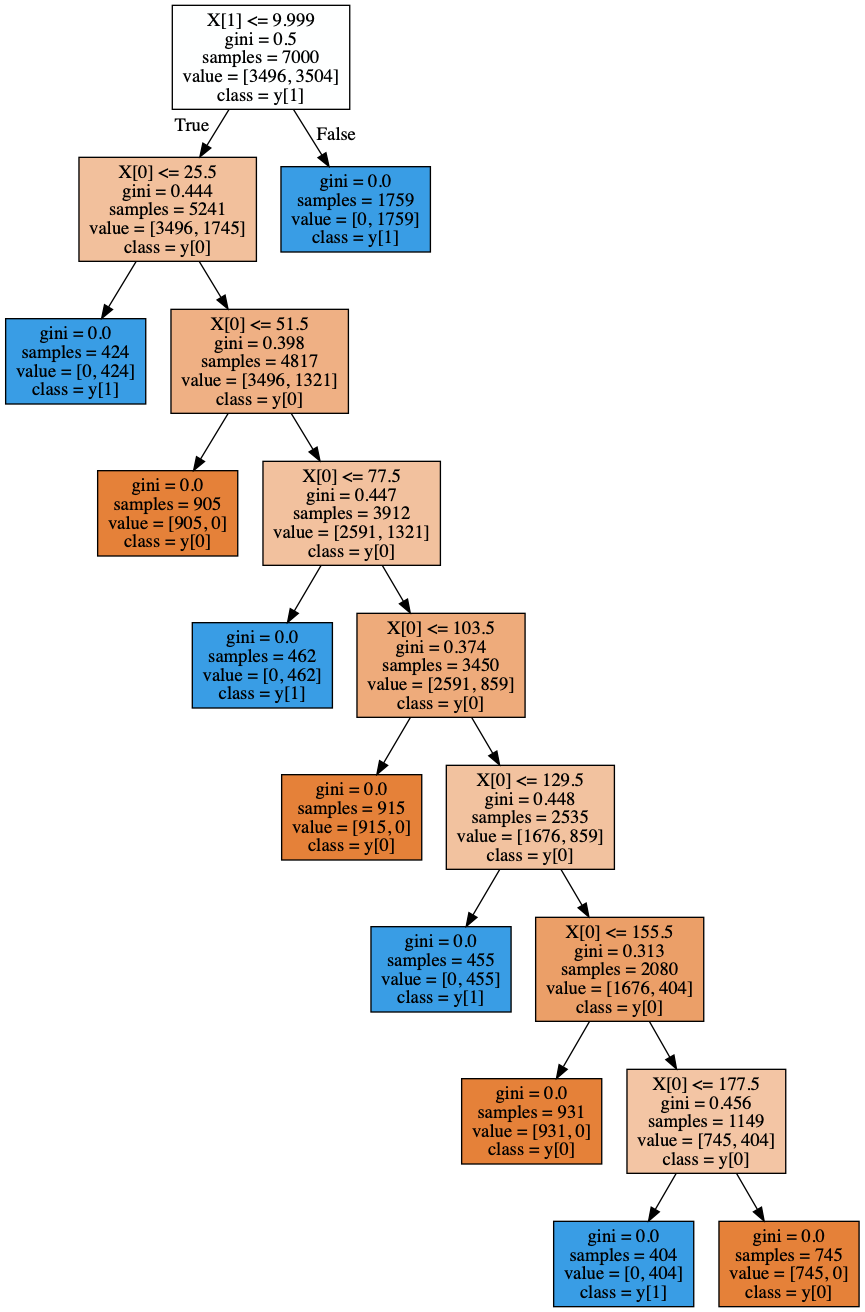

In [65]:
tree.export_graphviz(results_with_c_as_cat['models'][0], filled=True, class_names=True)

!dot -Tpng tree.dot -o tree.png

from IPython.display import display
from PIL import Image

# showing the image in notebook
display(Image.open('tree.png'))

In [52]:
print_sorted_mean_importances(results_with_c_as_cat)

                   c: 0.666
                   z: 0.334
                  x0: 0.000
                  x1: 0.000
                  x2: 0.000


In [53]:
print_sorted_mean_importances(results_with_c)

                   z: 0.340
                 x90: 0.036
                 x31: 0.031
                 x68: 0.025
                 x21: 0.021


In [54]:
h2o_results_no_c = evaluate_h2o_model(
    data_categorical, 
    feature_names=get_feature_names(data_categorical, include_c=False),
    target_col='y', 
    model=H2ODecisionTree())
print_auc_mean_std(h2o_results_no_c)

AUC: mean 0.7203, sd 0.0101


In [56]:
h2o_results_with_c = evaluate_h2o_model(
    data_categorical, 
    feature_names=get_feature_names(data_categorical, include_c=True),
    target_col='y',
    model=H2ODecisionTree())
print_auc_mean_std(h2o_results_with_c)

AUC: mean 1.0000, sd 0.0000


In [62]:
print_sorted_mean_importances(h2o_results_with_c)

                   c: 0.703
                   z: 0.297
                 x53: 0.000
                  x0: 0.000
                  x1: 0.000


In [57]:
model_path = h2o_results_with_c['models'][4].download_mojo()
model_path

'/Users/kevh/Projects/categorical_random_forests/DRF_model_python_1569755221453_190.zip'

In [60]:
model_pojo_path = h2o_results_with_c['models'][4].download_pojo()
model_pojo_path

/*
  Licensed under the Apache License, Version 2.0
    http://www.apache.org/licenses/LICENSE-2.0.html

  AUTOGENERATED BY H2O at 2019-09-29T22:17:02.781-04:00
  3.26.0.5
  
  Standalone prediction code with sample test data for DRFModel named DRF_model_python_1569755221453_190

  How to download, compile and execute:
      mkdir tmpdir
      cd tmpdir
      curl http://192.168.1.120:54321/3/h2o-genmodel.jar > h2o-genmodel.jar
      curl http://192.168.1.120:54321/3/Models.java/DRF_model_python_1569755221453_190 > DRF_model_python_1569755221453_190.java
      javac -cp h2o-genmodel.jar -J-Xmx2g -J-XX:MaxPermSize=128m DRF_model_python_1569755221453_190.java

     (Note:  Try java argument -XX:+PrintCompilation to show runtime JIT compiler behavior.)
*/
import java.util.Map;
import hex.genmodel.GenModel;
import hex.genmodel.annotations.ModelPojo;

@ModelPojo(name="DRF_model_python_1569755221453_190", algorithm="drf")
public class DRF_model_python_1569755221453_190 extends GenModel {
  p

In [6]:
model_pojo_path

In [25]:
h2o_results_with_c['models'][4]

In [58]:
!java -cp /Users/kevh/Tools/h2o-3.26.0.5/h2o.jar hex.genmodel.tools.PrintMojo --tree 0 -i $model_path -o model.gv -f 20 -d 3


Tree inconsistency found:
Note: this is a known issue for DRF and Isolation Forest models, please refer to https://0xdata.atlassian.net/browse/PUBDEV-6140
        Node 1 (parent)
            weight:      4382.0
            depth:       1
            colId:       1
            colName:     z
            leftward:    true
            naVsRest:    false
            splitVal:    10.00685
            isBitset:    false
            predValue:   0.20219079
            squaredErr:  706.85895
            leftChild:   Node 2
            rightChild:  Node 5
        Node 2 (left child)
            weight:      2176.0
            depth:       2
            colId:       55
            colName:     x53
            leftward:    false
            naVsRest:    false
            splitVal:    -31.272415
            isBitset:    false
            predValue:   4.5955883E-4
            squaredErr:  0.99954045
            leftChild:   Node 3
            rightChild:  Node 6
        Node 5 (right child)
      


Tree inconsistency found:
Note: this is a known issue for DRF and Isolation Forest models, please refer to https://0xdata.atlassian.net/browse/PUBDEV-6140
        Node 1 (parent)
            weight:      4382.0
            depth:       1
            colId:       1
            colName:     z
            leftward:    true
            naVsRest:    false
            splitVal:    10.00685
            isBitset:    false
            predValue:   0.20219079
            squaredErr:  706.85895
            leftChild:   Node 2
            rightChild:  Node 5
        Node 2 (left child)
            weight:      2176.0
            depth:       2
            colId:       55
            colName:     x53
            leftward:    false
            naVsRest:    false
            splitVal:    -31.272415
            isBitset:    false
            predValue:   4.5955883E-4
            squaredErr:  0.99954045
            leftChild:   Node 3
            rightChild:  Node 6
        Node 5 (right child)
      

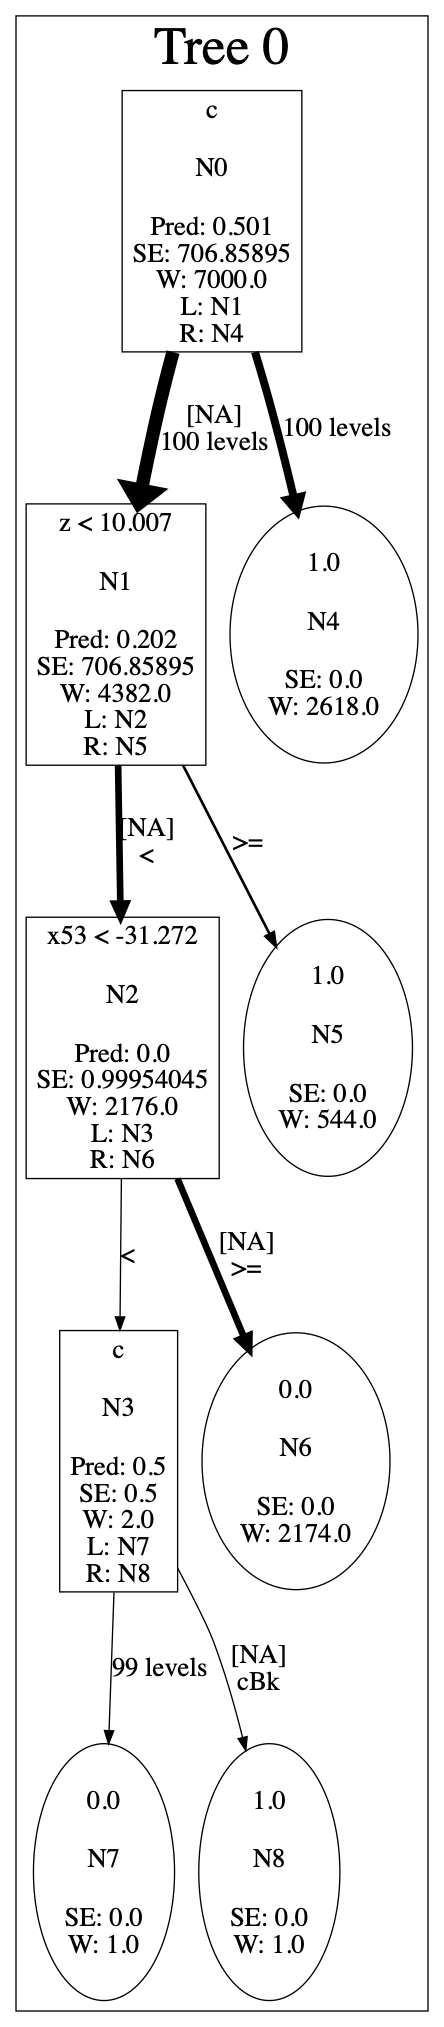

In [61]:
!java -cp /Users/kevh/Tools/h2o-3.26.0.5/h2o.jar hex.genmodel.tools.PrintMojo --detail -i $model_path -o model.gv -f 20 -d 3

!dot -Tpng model.gv -o model.png

from IPython.display import display
from PIL import Image

# showing the image in notebook
display(Image.open('model.png'))

In [ ]:
h2o_results_with_c['models'][0]

In [ ]:
print_sorted_mean_importances(h2o_results_with_c)